In [21]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
import keras

# 1. Ładowanie i przetwarzanie danych wejściowych

In [22]:
# Funkcja służąca do wczytania danych z wybranego pliku
def load_data_from_file(file_name):
    # Ładujemy nasze dane z repozytorium na GitHub
    data = pd.read_csv('https://raw.githubusercontent.com/nerooc/device-downtime-detection/main/data/{0}'.format(file_name), header=None).to_numpy()
    
    # Nie potrzebujemy indeksów 1, 2, 3, 4... itp., więc usuwamy pierwszą kolumnę
    COLUMNWISE = 1
    data = np.delete(data, obj=0, axis=COLUMNWISE)

    return data

# Funkcja służąca do wczytania wszystkich danych
def load_all_data(num_of_iters):
  # W tej liście przechowywać będziemy wszystkie dane z urządzenia
  data_blocks = []

  # Manipulacja danymi, żeby w każdej iteracji wczytać dane zarówno z pliku normal
  # jak i z pliku fault
  for i in range(num_of_iters):
    file_index = i + 1
    file_name_normal = f'data{file_index}_normal.csv'
    file_name_fault = f'data{file_index}_fault.csv'

    print(file_name_fault)

    # Dodatkowe wskazanie, że to odczyt dla działającego urządzenia (1)
    normal_data_block = [load_data_from_file(file_name_normal), 1]
    # Dodatkowe wskazanie, że to odczyt dla niedziałającego urządzenia (0)
    fault_data_block = [load_data_from_file(file_name_fault), 0]

    # Dodajemy te pakiety odczytów w każdej iteracji do wszystkich odczytów
    data_blocks.append(normal_data_block)
    data_blocks.append(fault_data_block)

  return data_blocks

# 2. Statystyki i wizualizacje


In [23]:
# Wczytujemy dane
# Jest 54 dla fault i 53 dla normal, ale wczytamy jedno mniej dla symetrii
data_blocks = load_all_data(num_of_iters=53)
# Dodajmy ostatni blok danych
data_fault_last = pd.read_csv('https://raw.githubusercontent.com/nerooc/device-downtime-detection/main/data/data54_fault.csv', header=None).to_numpy()
# Nie potrzebujemy indeksów 1, 2, 3, 4... itp., więc usuwamy pierwszą kolumnę
COLUMNWISE = 1
data_fault_last = np.delete(data_fault_last, obj=0, axis=COLUMNWISE)
data_blocks.append([data_fault_last, 0])

# Bloki działających urządzeń
working_blocks = [block[0] for block in data_blocks if block[1] == 1]

# Bloki niedziałających urządzeń

faulty_blocks = [block[0] for block in data_blocks if block[1] == 0]

data1_fault.csv
data2_fault.csv
data3_fault.csv
data4_fault.csv
data5_fault.csv
data6_fault.csv
data7_fault.csv
data8_fault.csv
data9_fault.csv
data10_fault.csv
data11_fault.csv
data12_fault.csv
data13_fault.csv
data14_fault.csv
data15_fault.csv
data16_fault.csv
data17_fault.csv
data18_fault.csv
data19_fault.csv
data20_fault.csv
data21_fault.csv
data22_fault.csv
data23_fault.csv
data24_fault.csv
data25_fault.csv
data26_fault.csv
data27_fault.csv
data28_fault.csv
data29_fault.csv
data30_fault.csv
data31_fault.csv
data32_fault.csv
data33_fault.csv
data34_fault.csv
data35_fault.csv
data36_fault.csv
data37_fault.csv
data38_fault.csv
data39_fault.csv
data40_fault.csv
data41_fault.csv
data42_fault.csv
data43_fault.csv
data44_fault.csv
data45_fault.csv
data46_fault.csv
data47_fault.csv
data48_fault.csv
data49_fault.csv
data50_fault.csv
data51_fault.csv
data52_fault.csv
data53_fault.csv


In [24]:
import seaborn as sns

working_blocks_np = working_blocks[0].copy()
faulty_blocks_np = faulty_blocks[0].copy()

for i in range(len(working_blocks) - 1):
  real_index = i + 1
  working_blocks_np = np.concatenate((working_blocks_np, working_blocks[real_index]), axis=0)

for i in range(len(faulty_blocks) - 1):
  real_index = i + 1
  faulty_blocks_np = np.concatenate((faulty_blocks_np, faulty_blocks[real_index]), axis=0)

working_blocks_df = pd.DataFrame(working_blocks_np)
faulty_blocks_df = pd.DataFrame(faulty_blocks_np)

# normalizacja danych
def normalize_data(df):
  for column in df:
    df[column] = df[column] / df[column].max()

  return df

working_blocks_df = normalize_data(working_blocks_df)
faulty_blocks_df = normalize_data(faulty_blocks_df)

# print(working_blocks_df)
# print(faulty_blocks_df)

In [25]:
working_blocks_df.describe()

,0,1,2,3,4,5,6,7,8
count,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000
mean,0.932900,0.677166,0.949002,0.719896,0.467825,0.667167,0.789547,0.903577,0.710817
std,0.023874,0.103450,0.021061,0.108799,0.350635,0.062488,0.152739,0.042812,0.053332
min,0.834356,0.541667,0.912664,0.578947,0.090909,0.577778,0.423077,0.781095,0.646018
25%,0.917178,0.583333,0.934498,0.605263,0.181818,0.622222,0.649725,0.868159,0.676991
50%,0.932515,0.666667,0.938865,0.710526,0.272727,0.655556,0.820055,0.893035,0.703540
75%,0.947853,0.750000,0.969432,0.763158,0.909091,0.688889,0.939560,0.942786,0.734513
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
faulty_blocks_df.describe()

,0,1,2,3,4,5,6,7,8
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,0.893776,0.746380,0.936217,0.780053,0.489139,0.679024,0.769403,0.879467,0.720671
std,0.034907,0.112058,0.032424,0.115168,0.359707,0.048907,0.145890,0.052489,0.040192
min,0.781609,0.520000,0.834061,0.547619,0.090909,0.558140,0.395349,0.712984,0.610619
25%,0.873563,0.680000,0.921397,0.690476,0.181818,0.651163,0.630491,0.840547,0.694690
50%,0.896552,0.760000,0.934498,0.785714,0.363636,0.674419,0.793282,0.879271,0.716814
75%,0.916667,0.800000,0.960699,0.857143,0.909091,0.709302,0.909561,0.920273,0.743363
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


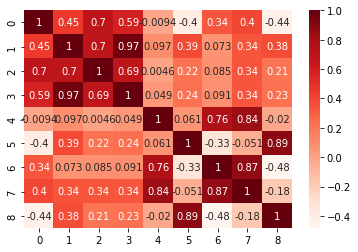

In [27]:
# na podstawie: https://stackoverflow.com/a/66506646
import seaborn as sns
corr = working_blocks_df.corr()
sns.heatmap(corr, cmap="Reds", annot=True)

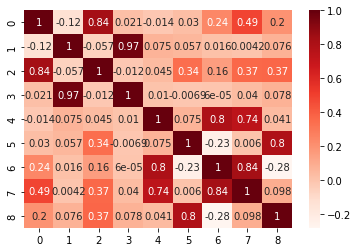

In [28]:
corr = faulty_blocks_df.corr()
sns.heatmap(corr, cmap="Reds", annot=True)

# 3. Budowa podstawowej sieci rekurencyjnej
Spróbujmy zbudować przykładowy model z prostą siecią rekurencyjną:

Podejście "zwykle": dzielimy zbior na uczacy i testujacy (ok. 80% danych dla uczacego), bardziej jako przyklad zeby zrobic jakakolwiek siec, pozniej sie pobawimy cross-validation, co docelowo mamy zrobic w tym tygodniu.

In [29]:
# przemieszajmy bloki danych
from sklearn.utils import shuffle

# utworzmy pakiety danych po 5 chwil czasowych nalezy miec na uwadze
# ze dane moga nie byc podzielne akurat przez 5 wiec usunmy kilka chwil czasowych
# na koncu obu zbiorow (zapisow dla dzialajacego i niedzialajaceg urzadzenia)
working_blocks_rest = len(working_blocks_df) % 5
faulty_blocks_rest = len(faulty_blocks_df) % 5

working_blocks_df = working_blocks_df[:-working_blocks_rest]
faulty_blocks_df = faulty_blocks_df[:-faulty_blocks_rest]

working_blocks_packets_df = np.array_split(working_blocks_df, int(len(working_blocks_df) / 5))
faulty_blocks_packets_df = np.array_split(faulty_blocks_df, int(len(faulty_blocks_df) / 5))

# dodajmy klasy zeby bylo wiadomo co jest czym -> nim przemieszamy pomiedzy klasami
working_blocks_packets_with_class = []

for i in range(len(working_blocks_packets_df)):
  working_blocks_packets_with_class.append( [working_blocks_packets_df[i].to_numpy(), 1] )

faulty_blocks_packets_with_class = []

for i in range(len(faulty_blocks_packets_df)):
  faulty_blocks_packets_with_class.append( [faulty_blocks_packets_df[i].to_numpy(), 0] )

input_list_completed = working_blocks_packets_with_class.copy()
input_list_completed.extend(faulty_blocks_packets_with_class)

# przemieszajmy dane po zlaczeniu
input_list_completed = shuffle(input_list_completed)

In [30]:
# teraz to, co tygrysy lubia najbardziej:
# dzielimy dane na uczace i testujace oraz w ich obrebie na parametry wejsciowe i klasy
# co daje 4 zbiory
from sklearn.model_selection import train_test_split

def prepare_input(input_list_completed):
  # przemieszajmy dane po zlaczeniu
  input_list_completed = shuffle(input_list_completed)
  X = []
  y = []

  for i in range(len(input_list_completed)):
    X.append(input_list_completed[i][0])
    y.append(input_list_completed[i][1])

  return (X, y)

X, y = prepare_input(input_list_completed)

# podzielmy dane - 80% na uczace, 20% - testujace
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train = np.array(X_train, dtype=float)
X_test = np.array(X_test, dtype=float)
y_train = np.array(y_train, dtype=float).reshape(len(y_train), 1) 
y_test = np.array(y_test, dtype=float).reshape((len(y_test), 1))

# tf.convert_to_tensor(X_train, dtype=tf.float32)
# tf.convert_to_tensor(X_test, dtype=tf.float32)

print(X_test.shape)
print(y_test.shape)

(166, 5, 9)
(166, 1)


In [31]:
import tensorflow as tf

def get_model(lr):
  # typowy sekwencyjny model
  model = Sequential()
  # dodajemy warstwe rekurencyjna, input_shape w naszym przypadku bedzie 31 (minut) x 9 parametrow
  # (nie liczac usunietego uprzednio indeksu wskazujacego z ktora minuta mamy do czynienia)
  model.add(SimpleRNN(15, input_shape=(5, 9), activation='relu', return_sequences=True))
  model.add(Dropout(0.2))
  model.add(SimpleRNN(10, activation='relu', return_sequences=False))
  # warstwa gesta na wyjscie - najbardziej typowe rozwiazanie

  # niezmiernie istotne -> binarna entropia krzyzowa wymaga jednego neuronu na wyjsciu
  model.add(Dense(units=1, activation='tanh'))
  opt = tf.optimizers.Adam(learning_rate=lr)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

  return model

In [40]:
# trenowanie modelu
model = get_model(lr=0.007)
history = model.fit(X_train, y_train, epochs=100, callbacks = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)])

Epoch 1/100
17/17 [==============================] - 2s 5ms/step - loss: 0.8579 - accuracy: 0.5019
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6823 - accuracy: 0.5528
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6708 - accuracy: 0.5679
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6542 - accuracy: 0.5849
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6221 - accuracy: 0.6679
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.6190 - accuracy: 0.6566
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6167 - accuracy: 0.6660
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6798 - accuracy: 0.6075
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6545 - accuracy: 0.6151
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6279 - accuracy: 0.6849
Epoch 11/

0.9339622855186462


Text(0, 0.5, 'skutecznosc (accuracy)')

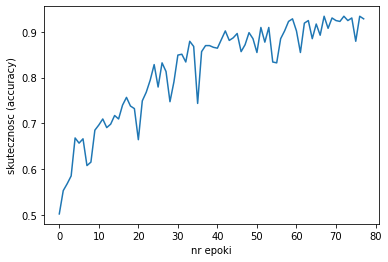

In [41]:
print(max(history.history['accuracy']))

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('nr epoki')
plt.ylabel('skutecznosc (accuracy)')

#validation_data=(X_test, y_test))

Niepoprawna predykcja, oczekiwany: 1.0, otrzymano: 0
Niepoprawna predykcja, oczekiwany: 1.0, otrzymano: 0
Niepoprawna predykcja, oczekiwany: 1.0, otrzymano: 0
Niepoprawna predykcja, oczekiwany: 1.0, otrzymano: 0
Niepoprawna predykcja, oczekiwany: 1.0, otrzymano: 0
Niepoprawna predykcja, oczekiwany: 1.0, otrzymano: 0
Niepoprawna predykcja, oczekiwany: 0.0, otrzymano: 1
Niepoprawna predykcja, oczekiwany: 1.0, otrzymano: 0
Niepoprawna predykcja, oczekiwany: 1.0, otrzymano: 0
Niepoprawna predykcja, oczekiwany: 1.0, otrzymano: 0
Niepoprawna predykcja, oczekiwany: 1.0, otrzymano: 0
Niepoprawna predykcja, oczekiwany: 0.0, otrzymano: 1
Poprawne przyporzadkowania to: 90.83969465648855 % wszystkich przyporzadkowan


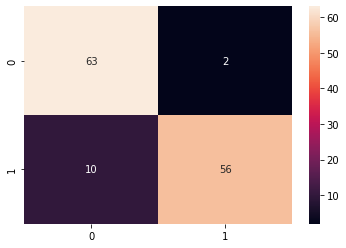

In [42]:
predictions = model.predict(X_test)

counter = 0
confusion_matrix=np.zeros((2, 2))

for i in range(len(predictions)):
  class_prediction = 0
  if predictions[i] >= 0.5:
    class_prediction = 1

  if class_prediction == y_test[i]:
    confusion_matrix[class_prediction][class_prediction] += 1
  else:
    print(f'Niepoprawna predykcja, oczekiwany: {y_test[i]}, otrzymano: {class_prediction}')
    confusion_matrix[(class_prediction + 1) % 2][class_prediction] += 1

sns.heatmap(confusion_matrix, annot=True)
print(f'Poprawne przyporzadkowania to: {(confusion_matrix[0][0] + confusion_matrix[1][1]) / len(y_test) * 100} % wszystkich przyporzadkowan')

Użycie walidacji krzyżowej (CV-5):

In [44]:
model = get_model(lr=0.0005)

for i in range(5):

  X, y = prepare_input(input_list_completed)

  total_folds_len = len(X)
  single_fold_size = int(total_folds_len / 5)

  folds_X = [X[0:single_fold_size - 1], X[single_fold_size:2*single_fold_size-1], X[2*single_fold_size:3*single_fold_size-1], 
            X[3*single_fold_size:4*single_fold_size-1], X[4*single_fold_size:total_folds_len-1]]
  folds_y = [y[0:single_fold_size - 1], y[single_fold_size:2*single_fold_size-1], y[2*single_fold_size:3*single_fold_size-1],
            y[3*single_fold_size:4*single_fold_size-1], y[4*single_fold_size:total_folds_len-1]]

  history_data_plot = []

  # Iterujemy po wszystkich 5 "paczkach" (CV-5), wybierajac dana paczke jako zbior walidujacy,
  # a pozostale dane jako zbior trenujacy
  for i in range(len(folds_X)):
    X_train = []
    y_train = []
    if i > 0:
      X_train = X[:single_fold_size * i]
      y_train = y[:single_fold_size * i]
    if i < len(folds_X) - 1:
      X_train = X_train + X[single_fold_size * (i + 1):]
      y_train = y_train + y[single_fold_size * (i + 1):]

    # zbiory trenujace dla danego folda
    X_train = np.array(X_train, dtype=float)
    y_train = np.array(y_train, dtype=float)

    # zbior testujacy (w danym foldzie):
    X_test = np.array(X[single_fold_size * i:single_fold_size * (i + 1) - 1], dtype=float)
    y_test = np.array(y[single_fold_size * i:single_fold_size * (i + 1) - 1], dtype=float)

    print(f'Rozmiar zbioru trenujacego: {len(X_train)} wejsc i {len(y_train)} etykiet')
    # trenowanie modelu
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
    history_data_plot.extend(history.history['accuracy'])

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
17/17 [==============================] - 0s 10ms/step - loss: 0.7992 - accuracy: 0.5226 - val_loss: 0.7271 - val_accuracy: 0.4580
Epoch 14/100
17/17 [==============================] - 0s 8ms/step - loss: 0.7237 - accuracy: 0.5321 - val_loss: 0.6922 - val_accuracy: 0.4885
Epoch 15/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6997 - accuracy: 0.5585 - val_loss: 0.6721 - val_accuracy: 0.5954
Epoch 16/100
17/17 [==============================] - 0s 7ms/step - loss: 0.7184 - accuracy: 0.5528 - val_loss: 0.6624 - val_accuracy: 0.6718
Epoch 17/100
17/17 [==============================] - 0s 8ms/step - loss: 0.7081 - accuracy: 0.5472 - val_loss: 0.6557 - val_accuracy: 0.6947
Epoch 18/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6764 - accuracy: 0.5906 - val_loss: 0.6554 - val_accuracy: 0.6870
Epoch 19/100
17/17 [==============================] - 0s 7ms/step - loss: 0.7067 - accuracy: 0.

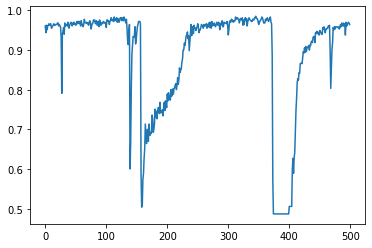

In [45]:
plt.plot(history_data_plot)

# Dalszy plan działania (W postaci checklisty

1. Wczytanie i przetwarzanie danych - ✅

2. Utworzenie oczekiwanych statystyk:
  - Średnie,
  - Mediany,
  - Odchylenia,
  - Korelacje,
  - Wizualizacje

3. Normalizacja danych

4. Cross-walidacja (CV5)

5. Stworzenie architektury składającej się z rekurencyjnych sieci neuronowych służącej do klasyfikacji i jej uczenie

6. Testowanie naszych rozwiązań (manualnie i w miarę możliwości automatycznie)

7. Porównanie wyników w zależności od zmian w topologii

8. Stworzenie sprawozdania na temat naszego rozwiązania

9. Stworzenie prezentacji opisującej nasze rozwiązanie oraz przedstawiającej napotkane problemy
